# Crack Segmentation Main

- Wandb Logger를 사용하려면 노트북을 사용해야 할 것 같아서 만들었습니다. - by 준휘

In [1]:
import argparse
import logging
import os

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm.autonotebook import tqdm

from sklearn.model_selection import train_test_split

from glob import glob
import torch
import torch.nn as nn
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader
import torchvision

from model import hardnet
from model import unet
from data.Dataset import CrackDataset

torch.__version__

'1.12.0+cu116'

In [ ]:
# wandb Key를 프로젝트 공용 키로 바꾸고 항상 재로그인
%env WANDB_API_KEY= 467dd430827bd3d12c84a54f4a72dac302f2bede
! wandb login

In [ ]:
seed = 42
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Currently using "{device}" device.')

np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

batch_size = 32
image_size = 256
num_classes = 1
epochs = 30

#unet 모델
model_u = unet
#hardnet 모델
model_h = hardnet

### 2. Data loader Test
직접 만든 데이터 셋을 기반으로 로더를 잘 불러오는지 확인합니다.

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.9725,
        0.9765, 0.9804, 0.9843, 0.9882, 0.9922, 0.9961, 1.0000])


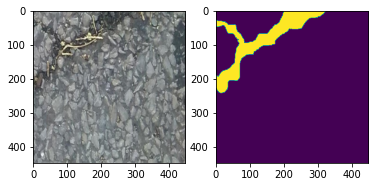

In [6]:
ds = CrackDataset('train')
img, label = ds.__getitem__(0)
print(label)

print(label.unique())

plt.subplot(121)
plt.imshow(img.cpu().detach().numpy().transpose(1,2,0))
plt.subplot(122)
plt.imshow(label.cpu().detach().numpy().transpose(1,2,0))

In [ ]:
def custom_imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

In [ ]:
print(label)

In [ ]:
convert_label = label.clone()
convert_label[convert_label > 0] = 1

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.9725,
        0.9765, 0.9804, 0.9843, 0.9882, 0.9922, 0.9961, 1.0000])


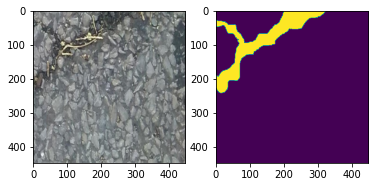

In [5]:
print(label.unique())
plt.subplot(121)
plt.imshow(img.cpu().detach().numpy().transpose(1,2,0))
plt.subplot(122)
plt.imshow(label.cpu().detach().numpy().transpose(1,2,0))
# print(convert_label.unique())
# print(convert_label.shape)
# convert_label.type()

In [ ]:
criterion = torch.nn.BCEWithLogitsLoss()
dummy = 
loss = 

In [ ]:
train_dataset = CrackDataset('train')
valid_dataset = CrackDataset('valid')

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

for i, (img, label) in enumerate(train_dataloader):
    # img shape [B, C, H, W]
    show_img = img[0]
    show_label = label[0]
    plt.subplot(121)
    plt.imshow(show_img.cpu().detach().numpy().transpose(1,2,0))
    plt.subplot(122)
    plt.imshow(show_label.cpu().detach().numpy().transpose(1,2,0))
    break

In [ ]:
import logging

def get_log(path, mode='train'):
    logger = logging.getLogger()
    logger.setLevel(logging.INFO)
    formatter = logging.Formatter('%(asctime)s - %(message)s')
    stream_handler = logging.StreamHandler()
    stream_handler.setFormatter(formatter)
    logger.addHandler(stream_handler)
    if mode == 'train':
        file_handler = logging.FileHandler(path+'train.log')
    else:
        file_handler = logging.FileHandler(path + 'eval.log')
    file_handler.setFormatter(formatter)
    logger.addHandler(file_handler)
    return logger

In [ ]:
def create_save_dir(name):
    default_path = "result"
    try:
        if not os.path.exists(default_path):
            os.makedirs(default_path)
        
        if not os.path.exists(default_path + '/' + name):
            os.makedirs(default_path + '/' + name)

    except:
        print("Error : Failed to create the directory")

    path = default_path + '/' + name +'/'
    
    return path

In [ ]:
path = create_save_dir("hello")

In [ ]:
logger = get_log(path)

In [ ]:
logger.info("hello~~")

In [ ]:
#! Model Save

epoch = 4
model = 선언한 모델
model = torch.util.Distribu(model) DDP
optimizer = torch.optim.Adam()
torch.save({
                'epoch' : epoch,
                'model_state_dict' : model.module.state_dict(), #model.module
                'optimizer_state_dict' : optimizer.state_dict(),
                'train_meter' : train_metrics_meters,
                'val_meter' : val_metrics_meters,
                'train_loss' : train_losses,
                # 'val_loss' : val_losses,
                'best_epoch' : best_epoch
            }, path + 'checkpoint.pth')



In [ ]:
#! Model Load from pretrained weight

checkpoint = torch.load('result/hello/checkpoint.pth',map_location=lambda storage, loc: storage)
load_state_dict = checkpoint['model_state_dict']
model.load_state_dict(load_state_dict)
logger.info("Pretrained Seg Model Load Finish !")

In [ ]:
wandb.init(project="test-project", entity="kau-rnd-aiclops")
wandb.config = {
	"learning_rate": 0.001,
	"epochs": 100,
	"batch_size": 128
}